# RetroPath2.0 analysis

In [1]:
# Add higher directory to python modules path

import sys

sys.path.append("..")

In [2]:
import os
import yaml

import pandas as pd

from retropath2_wrapper import retropath2

from biofoundry.retropath.preloader import RetroPathPreloader
from biofoundry.utils import save_fig

In [3]:
# Load config

with open("../config.yml") as config_file:
    config = yaml.safe_load(config_file)

## Data preparation

In [4]:
# Load the previously generated metadata (see 01-GEM.ipynb)
metadata_df = pd.read_csv(
    os.path.join(
        config["paths"]["genomes"],
        "genomes-metadata.csv"
    )
)

# Instantiate the preloader
preloader = RetroPathPreloader(config)

#### EC numbers

In [5]:
ec_numbers_df = preloader.get_ec_numbers(metadata_df)
ec_numbers_df

,ec_numbers,ID
0,3.6.1.1,aci
1,3.5.1.54,aci
2,1.11.1.21,aci
3,1.11.1.6,aci
4,1.2.4.1,aci
...,...,...
11584,2.7.7.77,tez
11585,2.6.1.58,tez
11586,4.1.99.22,tez
11587,4.6.1.17,tez


#### Rules

In [6]:
rules_df = preloader.get_rules()
rules_df

,Rule ID,Rule,EC number,Reaction order,Diameter,Score,Reaction directionality,Rule relative direction,Rule usage
8,MNXR129650_MNXM14259,([#8&v2:1](-[#6&v4:2](=[#8&v2:3])-[#6&v4:4](-[...,1.1.1.27,1,16,2.073,0,1,both
10,MNXR129650_MNXM14259,([#8&v2:1](-[#6&v4:2](=[#8&v2:3])-[#6&v4:4](-[...,1.1.1.28,1,16,2.073,0,1,both
23,MNXR102543_MNXM2074,([#8&v2:1](-[#6&v4:2](=[#8&v2:3])-[#6&v4:4](-[...,3.1.3.18,1,16,1.724,-1,-1,forward
48,MNXR124538_MNXM60,([#8&v2:1]=[#6&v4:2](-[#8&v2:3]-[#1&v1:4])-[#8...,6.3.5.5,1,16,2.228,-1,-1,forward
49,MNXR96485_MNXM60,([#8&v2:1]=[#6&v4:2](-[#8&v2:3]-[#1&v1:4])-[#8...,6.3.5.5,1,16,2.228,-1,-1,forward
...,...,...,...,...,...,...,...,...,...
239360,MNXR135838_MNXM21,([#6&v4:1]-[#6&v4:2](-[#1&v1:3])(-[#1&v1:4])-[...,2.8.3.8,1,2,0.301,0,1,both
239375,MNXR135084_MNXM1020,([#6&v4:1](-[#6&v4:2](-[#1&v1:3])(-[#1&v1:4])-...,2.8.1.6,1,2,2.293,1,1,forward
239385,MNXR129770_MNXM155041,([#6&v4:1]-[#6&v4:2](-[#8&v2:3]-[#1&v1:4])(-[#...,4.1.2.13,1,2,2.270,0,-1,both
239386,MNXR129802_MNXM167560,([#6&v4:1]-[#6&v4:2](-[#8&v2:3]-[#1&v1:4])(-[#...,4.1.2.13,1,2,2.270,0,-1,both


#### Sink

In [7]:
sink_df = preloader.get_sink()
sink_df

,Name,InChI
0,MNXM1,InChI=1S/p+1
1,MNXM37,"InChI=1S/C5H10N2O3/c6-3(5(9)10)1-2-4(7)8/h3H,1..."
2,MNXM40333,InChI=1S/C10H15N5O10P2/c11-8-5-9(13-2-12-8)15(...
3,MNXM9,"InChI=1S/H3O4P/c1-5(2,3)4/h(H3,1,2,3,4)/p-2"
4,MNXM10,InChI=1S/C21H29N7O14P2/c22-17-12-19(25-7-24-17...
...,...,...
1177,MNXM1482,"InChI=1S/C6H12N3O4P/c7-5(3-13-14(10,11)12)1-6-..."
1178,MNXM739527,InChI=1S/C6H14N4O2/c7-4(5(11)12)2-1-3-10-6(8)9...
1179,MNXM1108289,"InChI=1S/C3H7NO4S/c4-2(3(5)6)1-9(7)8/h2H,1,4H2..."
1180,MNXM739676,None


#### Source(s)

In [8]:
sources_df = preloader.get_sources()
sources_df

,Index,Name,Smile,InChI
0,0,sucrose,OC[C@H]1O[C@@](CO)(O[C@H]2O[C@H](CO)[C@@H](O)[...,InChI=1S/C12H22O11/c13-1-4-6(16)8(18)9(19)11(2...
1,1,galactose,OC[C@H]1OC(O)[C@H](O)[C@@H](O)[C@H]1O,InChI=1S/C6H12O6/c7-1-2-3(8)4(9)5(10)6(11)12-2...
2,2,arabinose,OC1OC[C@H](O)[C@H](O)[C@H]1O,InChI=1S/C5H10O5/c6-2-1-10-5(9)4(8)3(2)7/h2-9H...
3,3,glucose,OC[C@H]1OC(O)[C@H](O)[C@@H](O)[C@@H]1O,InChI=1S/C6H12O6/c7-1-2-3(8)4(9)5(10)6(11)12-2...
4,4,fructose,OCC1(O)OC[C@@H](O)[C@@H](O)[C@@H]1O,InChI=1S/C6H12O6/c7-2-6(11)5(10)4(9)3(8)1-12-6...
...,...,...,...,...
440,440,homospermidine,NC(N)=NCCCC(=O)C(=O)O,InChI=1S/C6H11N3O3/c7-6(8)9-3-1-2-4(10)5(11)12...
441,441,2-oxoarginine,NCCCCNCCCNCCCN,InChI=1S/C10H26N4/c11-5-1-2-7-13-9-4-10-14-8-3...
442,442,thermospermine,NC(N)=NCCCC(NC(CCC(=O)O)C(=O)O)C(=O)O,InChI=1S/C11H20N4O6/c12-11(13)14-5-1-2-6(9(18)...
443,443,nopaline,NCCCNCCCCNCCCN,InChI=1S/C10H26N4/c11-5-3-9-13-7-1-2-8-14-10-4...


#### Launch RetroPath

In [9]:
%%script false --no-raise-error

rules_path = os.path.join(
    config["paths"]["retropath"],
    config["retropath"]["files"]["rules"]
)
sink_path = os.path.join(
    config["paths"]["retropath"],
    config["retropath"]["files"]["sink"]
)
sources_dir = os.path.join(
    config["paths"]["retropath"],
    "interesting_metabolites/",
    "sources/"
)
output_dir = os.path.join(
    config["paths"]["retropath"],
    "interesting_metabolites/",
    "experiments/"
)

for source_file in os.listdir(sources_dir):

    source_outpur_dir = os.path.join(
        output_dir,
        os.path.splitext(source_file)[0]
    )

    r_code = retropath2(
        rules_file=os.path.abspath(rules_path),
        sink_file=os.path.abspath(sink_path),
        source_file=os.path.abspath(os.path.join(sources_dir, source_file)),
        outdir=os.path.abspath(source_outpur_dir),
        dmax=config["retropath"]["params"]["dmax"],
        dmin=config["retropath"]["params"]["dmin"],
        max_steps=config["retropath"]["params"]["max_steps"],
        topx=config["retropath"]["params"]["topx"],
        mwmax_source=config["retropath"]["params"]["mwmax_source"]
    )


## Results

### Organisms with 3-hydroxybutyrate in sink

In [10]:
source_ids = [
    "MNXM1104965",
    "MNXM1104966",
    "MNXM1104967"
]

preloader.get_orgs_with_source_in_sink(source_ids)

,Organism,Source match
45707,aci,MNXM1104965
175845,rhi1,MNXM1104967
175846,rhi2,MNXM1104967
195504,aci,MNXM1104966
195505,dmi,MNXM1104966
195506,pse,MNXM1104966
195507,rhi1,MNXM1104966
195508,rhi2,MNXM1104966
195509,shw,MNXM1104966
195510,tel,MNXM1104966


### RetroPath2.0 results

In [11]:
from biofoundry.retropath.plots import (
    get_retropath_results,
    plot_retropath_results,
    get_classes_counts,
    plot_classes_counts
)

In [12]:
results_df = get_retropath_results(config)
results_df

,Source,Status
0,3-phosphoglycerate,Source in sink
1,benzoic_acid,Source in sink
2,"d-xylono-1,4-lactone",Source in sink
3,taxifolin,Results but no scope
4,myo-inositol,Source in sink
...,...,...
440,glycerone,Error
441,l-glutamate,Error
442,propanal,Error
443,l-phenylalanine,Error


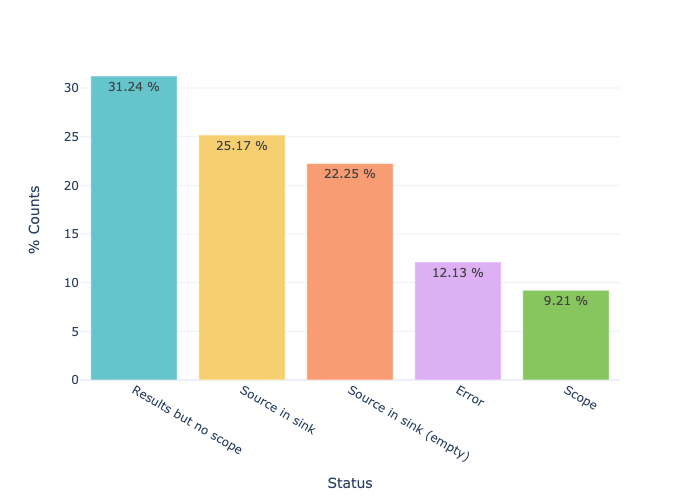

In [13]:
fig = plot_retropath_results(
    results_df=results_df,
    config=config
)
fig.show("png")

save_fig(
    fig=fig,
    filename="retropath-results.jpg",
    config=config
)

### Classification of compounds

In [14]:
class_counts_df = get_classes_counts(
    results_df=results_df,
    config=config
)
class_counts_df

,Status,Class,Counts
134,Results but no scope,Phenylacetate,43
266,Source in sink,Phenylacetate,40
289,Source in sink,Tyrosine,30
62,Error,Tyrosine,26
44,Error,Phenylacetate,26
...,...,...,...
1,Error,"2,4-Dichlorophenoxyacetic Acid",1
192,Scope,Naphthalene,1
193,Scope,Naphthalenesulfonate Family,1
194,Scope,"Neomycin, kanamycin and gentamicin biosynthesis",1


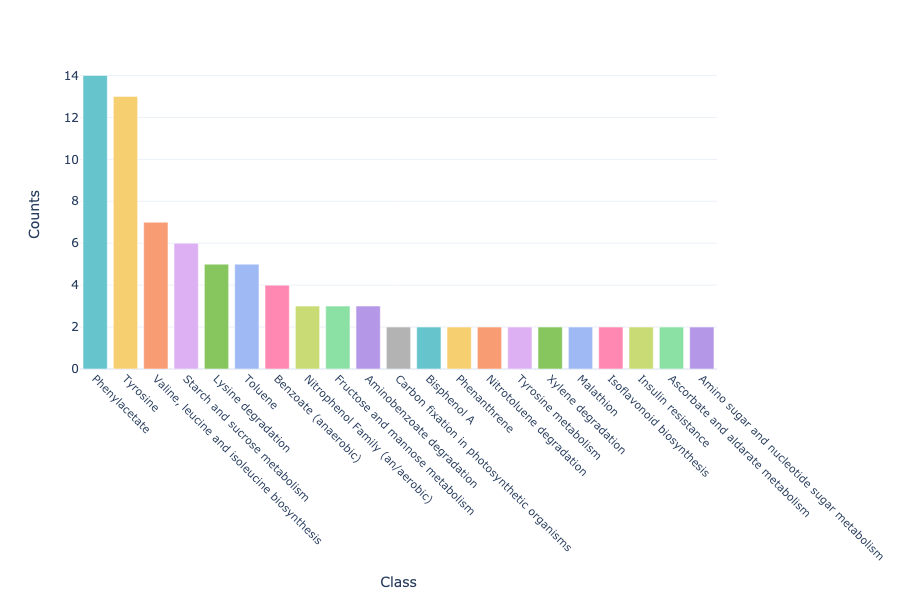

In [15]:
status = "Scope"

fig = plot_classes_counts(
    counts_df=class_counts_df,
    config=config,
    status=status
)
fig.show("png")

save_fig(
    fig=fig,
    filename=f"retropath-classes-{status.lower()}.jpg",
    config=config
)